In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [26]:
df = pd.read_csv("../../data/dataset.csv")
df

,Player_id,Season,Games,PPG,Goals,Assists,Yellow_cards,Yellow_red_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played,Club_id,Competition,MarketValue,Days_injured,international,Liga,Liga_level,W,D,L,Points,Goales_scored,Goales_conceded
0,10,2004,45,1.60,17,11,4,0,0,0,110.0,3244,86,Bundesliga,12000000,0.0,True,Bundesliga,First Tier,18,5,11,59,68,37
1,299,2004,47,1.77,2,5,8,0,0,0,363.0,4164,86,Bundesliga,9000000,0.0,True,Bundesliga,First Tier,18,5,11,59,68,37
2,690,2004,41,1.80,19,14,5,0,0,0,136.0,3001,86,Bundesliga,7500000,0.0,True,Bundesliga,First Tier,18,5,11,59,68,37
3,4316,2004,35,1.74,1,0,2,0,0,0,478.0,2985,86,Bundesliga,4500000,0.0,True,Bundesliga,First Tier,18,5,11,59,68,37
4,4403,2004,28,1.82,3,6,4,0,0,0,130.0,1898,86,Bundesliga,4000000,0.0,True,Bundesliga,First Tier,18,5,11,59,68,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177150,1044893,2022,5,0.70,1,0,2,0,0,0,172.0,345,8152,N3 - Hauts-de-France,150000,0.0,False,National 3 - Hauts-de-France,Fifth Tier,10,2,5,32,41,20
177151,913674,2022,12,0.83,0,0,2,0,0,0,0.0,990,56695,N3 - Nouvelle-Aqu.,100000,0.0,False,National 3 - Nouvelle-Aquitaine,Fifth Tier,8,4,5,28,27,19
177152,925829,2022,17,1.33,2,0,3,0,0,0,218.0,1426,9113,U19 Boys League,50000,0.0,False,U19 Boys League,Youth league,5,0,11,15,27,45
177153,926987,2022,9,0.64,1,2,0,0,0,0,109.0,432,9113,U19 Boys League,100000,0.0,True,U19 Boys League,Youth league,5,0,11,15,27,45


In [27]:
print(df.shape)
print(df.columns)

(177155, 25)
Index(['Player_id', 'Season', 'Games', 'PPG', 'Goals', 'Assists',
       'Yellow_cards', 'Yellow_red_cards', 'Red_cards', 'Penalty_goals',
       'Minutes_per_goal', 'Minutes_played', 'Club_id', 'Competition',
       'MarketValue', 'Days_injured', 'international', 'Liga', 'Liga_level',
       'W', 'D', 'L', 'Points', 'Goales_scored', 'Goales_conceded'],
      dtype='object')


In [55]:
df.dtypes

Player_id             int64
Season                int64
Games                 int64
PPG                 float64
Goals                 int64
Assists               int64
Yellow_cards          int64
Yellow_red_cards      int64
Red_cards             int64
Penalty_goals         int64
Minutes_per_goal    float64
Minutes_played        int64
Club_id               int64
Competition          object
MarketValue           int64
Days_injured        float64
international          bool
Liga                 object
Liga_level           object
W                     int64
D                     int64
L                     int64
Points                int64
Goales_scored         int64
Goales_conceded       int64
dtype: object

In [28]:
df.nunique(axis=0)

Player_id           23655
Season                 20
Games                  80
PPG                   304
Goals                  60
Assists                33
Yellow_cards           27
Yellow_red_cards        5
Red_cards               6
Penalty_goals          16
Minutes_per_goal     2412
Minutes_played       4803
Club_id              4457
Competition           665
MarketValue           352
Days_injured          649
international           2
Liga                  557
Liga_level             10
W                      36
D                      25
L                      38
Points                114
Goales_scored         121
Goales_conceded       116
dtype: int64

In [29]:
df.Liga_level.value_counts()

First Tier               106574
Second Tier               43379
Third Tier                14543
Fourth Tier                5970
Youth league               4293
Play-Offs                  1044
Reserve league              703
Fifth Tier                  519
Regional Championship        68
Sixth Tier                   62
Name: Liga_level, dtype: int64

In [56]:
df.Competition.value_counts()

Premier Liga                       8839
Ligue 1                            6871
Premier League                     6803
Serie A                            6545
LaLiga                             6401
                                   ... 
Oberliga NDS-Ost                      1
Liga Nacional Cl                      1
2. Liga inter - Gr. 1 (- 11/12)       1
Revelação U23 - Qualif. round         1
Prva HNL - Juniori                    1
Name: Competition, Length: 665, dtype: int64

In [57]:
df.Liga.value_counts() #fjerne liga

Premier Liga                     9589
Serie A                          7145
Ligue 1                          7034
Premier League                   6934
LaLiga                           6709
                                 ... 
Liga Guate Apertura                 1
Liga Dominicana de Fútbol           1
National 3 - Pays de la Loire       1
S.League                            1
Prva HNL - Juniori                  1
Name: Liga, Length: 557, dtype: int64

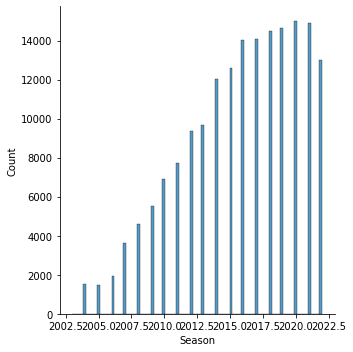

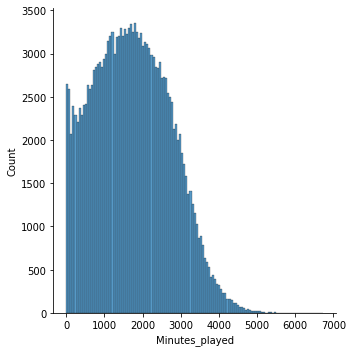

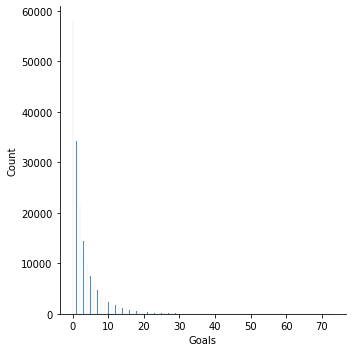

In [53]:
df.Season.value_counts()
display(sns.displot(df['Season']))
display(sns.displot(df['Minutes_played']))
display(sns.displot(df['Goals']))

In [30]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Player_id,Season,Games,PPG,Goals,Assists,Yellow_cards,Yellow_red_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played,Club_id,MarketValue,Days_injured,W,D,L,Points,Goales_scored,Goales_conceded
count,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000,177155.000000
mean,182437.575586,2015.742847,24.540724,1.336631,2.990122,1.944873,3.659750,0.114815,0.101950,0.265671,229.454026,1734.882927,6050.150795,2242022.198075,20.498665,12.870673,8.502419,11.416917,47.063498,45.079366,41.643820
std,166667.543217,4.422104,11.329541,0.583288,4.361801,2.706929,3.020840,0.350687,0.325900,0.902682,331.232157,997.146468,11473.707921,6317897.723009,1562.933062,5.635269,3.429401,5.357417,17.143184,16.252346,14.683128
min,10.000000,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.000000,0.000000,0.000000
25%,52082.000000,2013.000000,16.000000,0.900000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,941.000000,430.000000,200000.000000,0.000000,9.000000,6.000000,7.000000,35.000000,34.000000,31.000000
50%,129627.000000,2016.000000,25.000000,1.350000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,125.000000,1695.000000,1245.000000,500000.000000,0.000000,12.000000,8.000000,11.000000,46.000000,44.000000,41.000000
75%,271622.000000,2019.000000,33.000000,1.750000,4.000000,3.000000,5.000000,0.000000,0.000000,0.000000,302.000000,2464.500000,5781.000000,1500000.000000,0.000000,16.000000,11.000000,15.000000,58.000000,55.000000,51.000000
max,1059630.000000,2022.000000,84.000000,4.180000,73.000000,35.000000,26.000000,4.000000,5.000000,15.000000,3628.000000,6730.000000,101302.000000,200000000.000000,657380.000000,35.000000,24.000000,37.000000,113.000000,121.000000,134.000000


In [43]:
# print(df[df['Yellow_cards']==26])
# print(df[df['Goals']==73])
# print(print(df[df['Penalty_goals']==15]))
# print(print(df[df['Assists']==35]))
# print(df[df['Days_injured']==657380]) # her kan det være feil verdier
tmp = df.query("Points < 0")
print(tmp.nunique(axis=0)) # Kan ikke ta log av negative tall

Player_id           37
Season               7
Games               24
PPG                 29
Goals                6
Assists              5
Yellow_cards         9
Yellow_red_cards     2
Red_cards            2
Penalty_goals        4
Minutes_per_goal    18
Minutes_played      36
Club_id              8
Competition          7
MarketValue         17
Days_injured         5
international        2
Liga                 7
Liga_level           3
W                    6
D                    5
L                    6
Points               5
Goales_scored        7
Goales_conceded      8
dtype: int64


C:\Users\olmst\AppData\Local\Temp\ipykernel_17676\3624870931.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()# plot the heatmap


<Axes: >

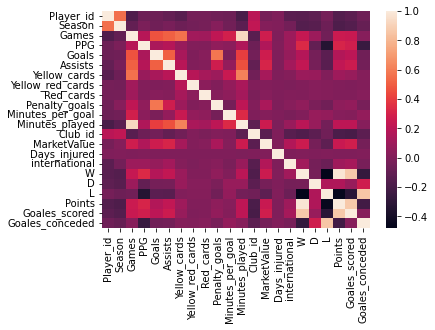

In [62]:
# calculate correlation matrix
sns.set(rc = {'figure.figsize':(15,8)})
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)